# COGS 181 - Homework 2


## 4 - Error Metrics

#### 1)
The data matrix $X$ is given by
$
\left(\begin{array}{cc}
8 & 8 & 16 & 4 \\
4 & 1 & 1 & 16 \\
6 & 4 & 4 & 2 \\
4 & 2 & 4 & 1 \\
8 & 4 & 8 & 2
\end{array}\right)
$ 

The label matrix Y is given by
$
\left(\begin{array}{cc}
1 \\
-1 \\
1 \\
-1\\
1
\end{array}\right)
$

#### 2)
The values computed for $y_i$ is:
$
\left(\begin{array}{cc}
2.4 \\
-1.5 \\
-1.4 \\
-8.5 \\
3
\end{array}\right)
$ and the corresponding prediction labels are:
$
\left(\begin{array}{cc}
1 \\
-1 \\
-1 \\
-1 \\
1
\end{array}\right)
$

### 3)

Accuracy: 0.8

Precision: 1.0

Recall: 0.666666666667

F-Score: 0.8


In [2]:
import numpy as np


X = np.matrix([
    [8, 1, 16, 4],
    [4, 1, 1, 16],
    [6, 4, 4, 2],
    [4, 2, 4, 1],
    [8, 4, 8, 2]
])
Y = [1,-1,1,-1,1]
W = np.array([1.2, 2, 0.5, 0.7])
b = -20

def classify(X,W,b):
    values = np.inner(W,X) + b
    print "Values:", values
    result = [-1 + (2 * (x >= 0)) for x in values]
    return np.asarray(result)[0][0]

result = classify(X,W,b)
print "Predictions:", result

Values: [[ 2.4 -1.5 -1.4 -8.5  3. ]]
Predictions: [ 1 -1 -1 -1  1]


In [24]:
correct_hit = sum([result[i] == Y[i] for i in range(len(result))])
targets_hit = np.sum([(Y[i] == 1 and result[i] == 1) for i in range(len(result))])
total_hits = np.sum([result[i] == 1 for i in range(len(result))]) 
total_targets = np.sum([Y[i] == 1 for i in range(len(result))])

accuracy = correct_hit / float(len(Y))
precision = targets_hit / float(total_hits)
recall = targets_hit / float(total_targets)
f_score = 2 * precision * recall / ( precision + recall)

print "Accuracy:", accuracy
print "Precision:", precision
print "Recall:", recall
print "F-Score:", f_score


Accuracy: 0.8
Precision: 1.0
Recall: 0.666666666667
F-Score: 0.8


## 5 - Polynomial Regression
#### 1)
The L2 loss formula is 
$$\sum_{i=1}^n (f(x_i) - y_i)^2$$
Where
$$ f(x_i) = ax_i^2 + bx + c$$
Which can be written in matrix form as:
$$ f(X) = X^TW$$
where $$ X = (1, x, x^2) $$
The LSE can be written in matrix form as:
$$G = (X^TW-Y)^T(X^TW-Y)$$
$$G = W^TX^TXW - W^TX^TY - Y^TXW + Y^TY $$
We derive on respect with W and set it to 0.
$$ \frac{dG}{dW} = X^TXW - X^TXW - X^TY - X^TY = 0$$
$$ X^TXW = X^TY$$
Then W will be:
$$ W = (X^TX)^{-1}X^TY $$


#### 2) 
Look at code under, together with a graph. Quadratic model is shown as the orange line.

#### 3)
By just viewing the two models in the plot, we clearly see that the quadratic model is a better solution. This is also confirmed after computing the least square error, where we see that the LSE for linear model is 206, while only 15 for the quadratic model.

/Users/hakonhukkelas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


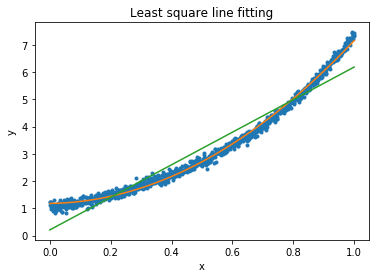

LSE for linear model 206.011861905
LSE for quadratic model: 15.7605107198


In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = np.loadtxt('data.txt', dtype='float')
%matplotlib inline
x = data[:,0].reshape(len(data),1)
Y = data[:,1].reshape(len(data),1)
# Squared x_i = [1, x, x^2]
X_square = np.hstack((np.ones((len(x),1)),np.power(x,1), np.power(x,2)))
# Linear x_i = [1, x]
X_1 =  np.hstack((np.ones((len(x),1)),np.power(x,1)))

# The LSE for the squared model
sol = np.dot(np.linalg.inv(np.dot(X_square.T,X_square)), np.dot(X_square.T, Y))
# LSE for linear model
sol_hw1 = np.dot(np.linalg.inv(np.dot(X_1.T,X_1)), np.dot(X_1.T, Y))


data_line = plt.plot(x,Y, '.')
plt.hold(True)
quad_line = plt.plot(x,sol[0]+sol[1]*x + sol[2]*x**2, label="Line 1")

lin_line = plt.plot(x,sol_hw1[0] + sol_hw1[1]*x)
plt.title('Least square line fitting')
plt.xlabel('x')
plt.ylabel('y')

plt.show()
def LSE(X,Y,W):
    part1 = (np.dot(X, W) - Y)
    part2 = (np.dot(X, W) - Y)
    return np.dot(part1.T, part2)[0][0]
print "LSE for linear model", LSE(X_1, Y, sol_hw1)
print "LSE for quadratic model:", LSE(X_square, Y,sol,)

## 6 - L1 Loss Regression

#### 1)
L1 loss is given by $$ L(W) = \sum_{i=1}^n |(X_i^TW - Y_i)|$$

We want to find $$ W^* = argmin_W \sum_{i=1}^n |(X_i^TW - Y_i)|$$

The derivative of f(x) can be written as

$$ \frac{|df(W)|}{dW} = sign(X_i^TW - Y_i) X_i$$ 

Then we have
$$ \frac{dL(W)}{dW} = \sum_{i=1}^n sign(X_i^TW - Y_i) X_i$$

And then we can find W by:

$$ W_{t+1} = W_t - \lambda_t \frac{dL(W)}{dW}$$

#### 2) & 3) 
Given below

/Users/hakonhukkelas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


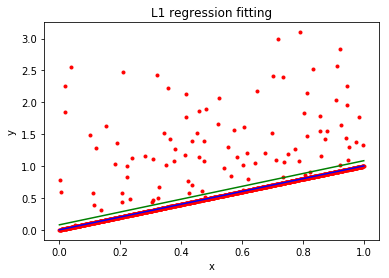

In [10]:

alpha = 0.00001
iterations = 2000
W = [0, 0]

data = np.loadtxt('data_2.txt', dtype='float')
%matplotlib inline
x = data[:,0].reshape(len(data),1)
Y = data[:,1].reshape(len(data),1)

# Linear x_i = [1, x]
X =  np.hstack((np.ones((len(x),1)),np.power(x,1)))

def L_prime(X,Y,W):
    res = 0
    for i in range(len(X)):
        sign = np.sign(np.dot(X[i], W) - Y[i])
        res += sign * X[i]
    return res

def regression(X, Y, alpha, iterations):
    W = np.array([0, 0]).T
    for i in range(iterations):
        W = W - alpha * L_prime(X ,Y, W)
    return W
# The L1 error regression
sol_6 = regression(X,Y,alpha,iterations)
# L2 error regression
sol_hw1 = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T, Y))


data_line = plt.plot(x,Y, ".r")
plt.hold(True)
plt.plot(x,sol_6[0] + sol_6[1]*x, '-b')
plt.plot(x,sol_hw1[0] + sol_hw1[1]*x, '-g')
plt.title('L1 regression fitting')
plt.xlabel('x')
plt.ylabel('y')


